# Import All Packages:

In [4]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

In [5]:
data=pd.read_csv('TATASTEEL.csv')

In [6]:
data.shape

(5306, 15)

In [7]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,TISCO,EQ,142.35,148.00,153.2,146.10,152.50,152.45,150.92,2003185,3.023164e+13,NaN,NaN,NaN
1,2000-01-04,TISCO,EQ,152.45,150.10,153.0,143.05,151.95,150.80,151.03,1555136,2.348785e+13,NaN,NaN,NaN
2,2000-01-05,TISCO,EQ,150.80,144.60,162.9,144.60,158.00,156.55,156.85,3840284,6.023364e+13,NaN,NaN,NaN
3,2000-01-06,TISCO,EQ,156.55,158.95,169.1,158.95,169.00,168.25,167.61,2560449,4.291530e+13,NaN,NaN,NaN
4,2000-01-07,TISCO,EQ,168.25,173.40,179.0,166.30,170.55,171.95,173.89,3641691,6.332459e+13,NaN,NaN,NaN


# Time Series Data Analysis:

In [8]:
data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.792000e+03,4792.000000
mean,403.385658,404.253581,411.210460,396.509197,403.467414,403.553703,404.062991,6.165253e+06,2.664876e+14,93969.268730,1.550750e+06,0.260951
std,187.146366,187.559958,190.791329,183.858461,187.265190,187.312178,187.436529,5.329084e+06,3.012861e+14,58218.860189,1.215813e+06,0.107903
min,67.250000,66.000000,69.700000,66.000000,67.300000,67.250000,67.970000,2.329100e+04,2.159165e+11,2796.000000,2.415800e+04,0.045100
25%,275.775000,275.600000,284.412500,270.000000,275.812500,275.937500,276.935000,2.801380e+06,1.118719e+14,57557.250000,7.698500e+05,0.180500
50%,402.850000,403.000000,409.375000,396.650000,402.700000,402.900000,403.430000,4.800300e+06,1.949303e+14,79400.000000,1.250946e+06,0.253000
75%,523.987500,525.000000,534.725000,516.487500,523.950000,524.075000,525.230000,7.833888e+06,3.379640e+14,110710.250000,2.018066e+06,0.327700
max,1031.350000,1024.000000,1052.600000,1011.100000,1035.000000,1034.000000,1031.950000,6.428460e+07,4.881124e+15,626502.000000,2.643472e+07,0.970100


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4792 non-null   float64
 14  %Deliverble         4792 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [10]:
data.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [11]:
data=data[['Open', 'High', 'Low', 'Last', 'VWAP', 'Volume','Close']]

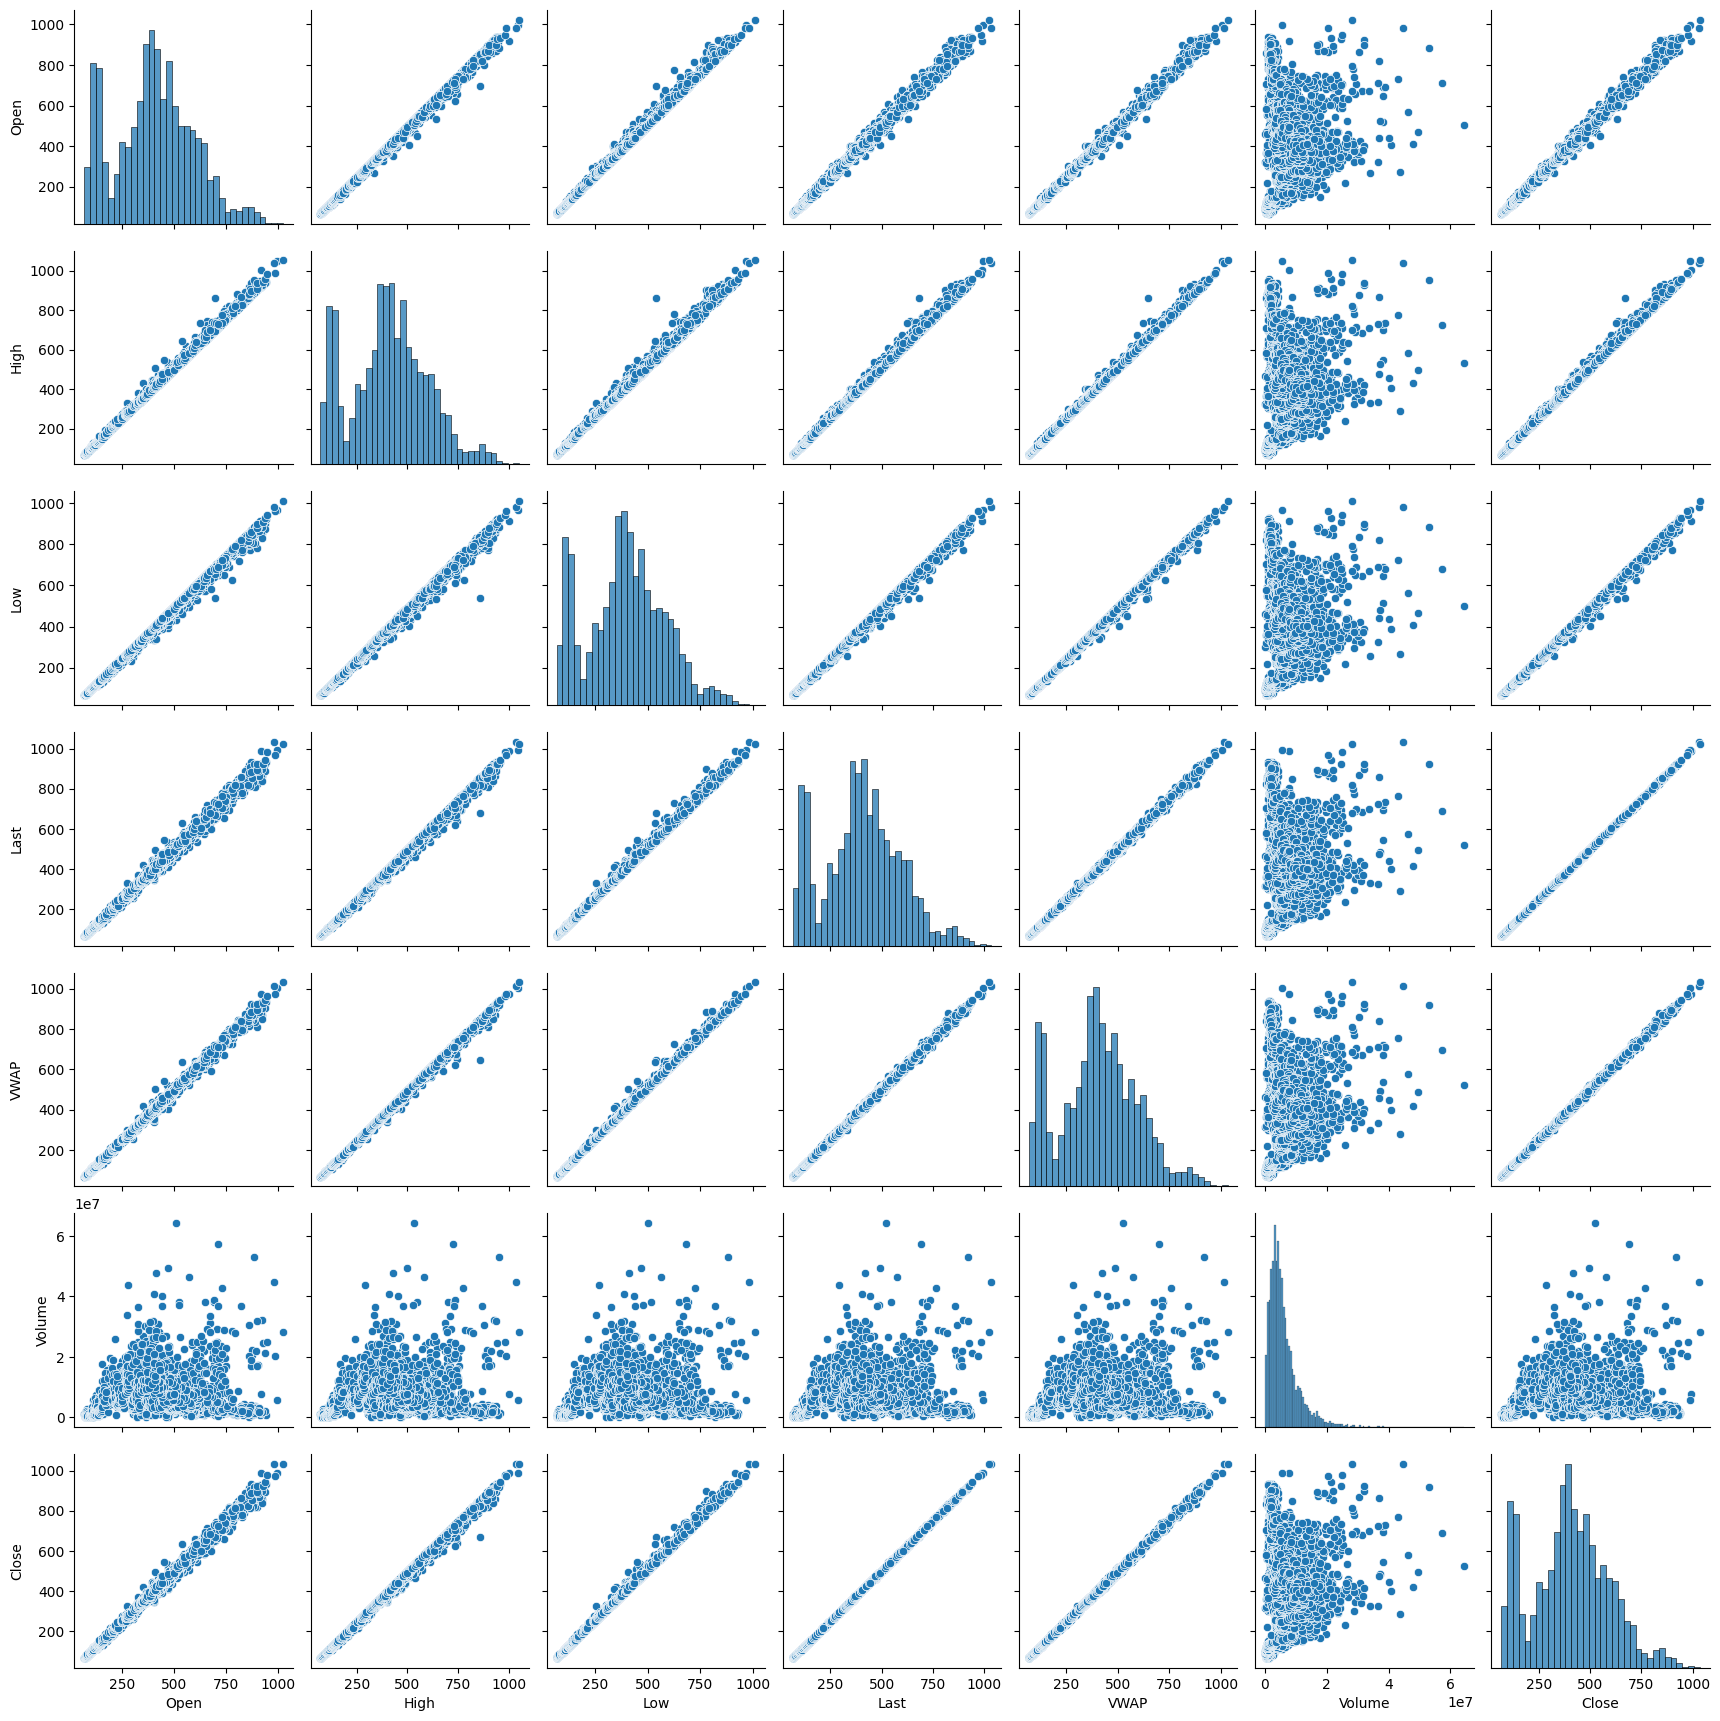

In [12]:
sns.pairplot(data)

In [13]:
data.head()

,Open,High,Low,Last,VWAP,Volume,Close
0,148.00,153.2,146.10,152.50,150.92,2003185,152.45
1,150.10,153.0,143.05,151.95,151.03,1555136,150.80
2,144.60,162.9,144.60,158.00,156.85,3840284,156.55
3,158.95,169.1,158.95,169.00,167.61,2560449,168.25
4,173.40,179.0,166.30,170.55,173.89,3641691,171.95


In [14]:
uni_data=data['Close'].values

In [15]:
len(uni_data)

5306

In [16]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 10]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

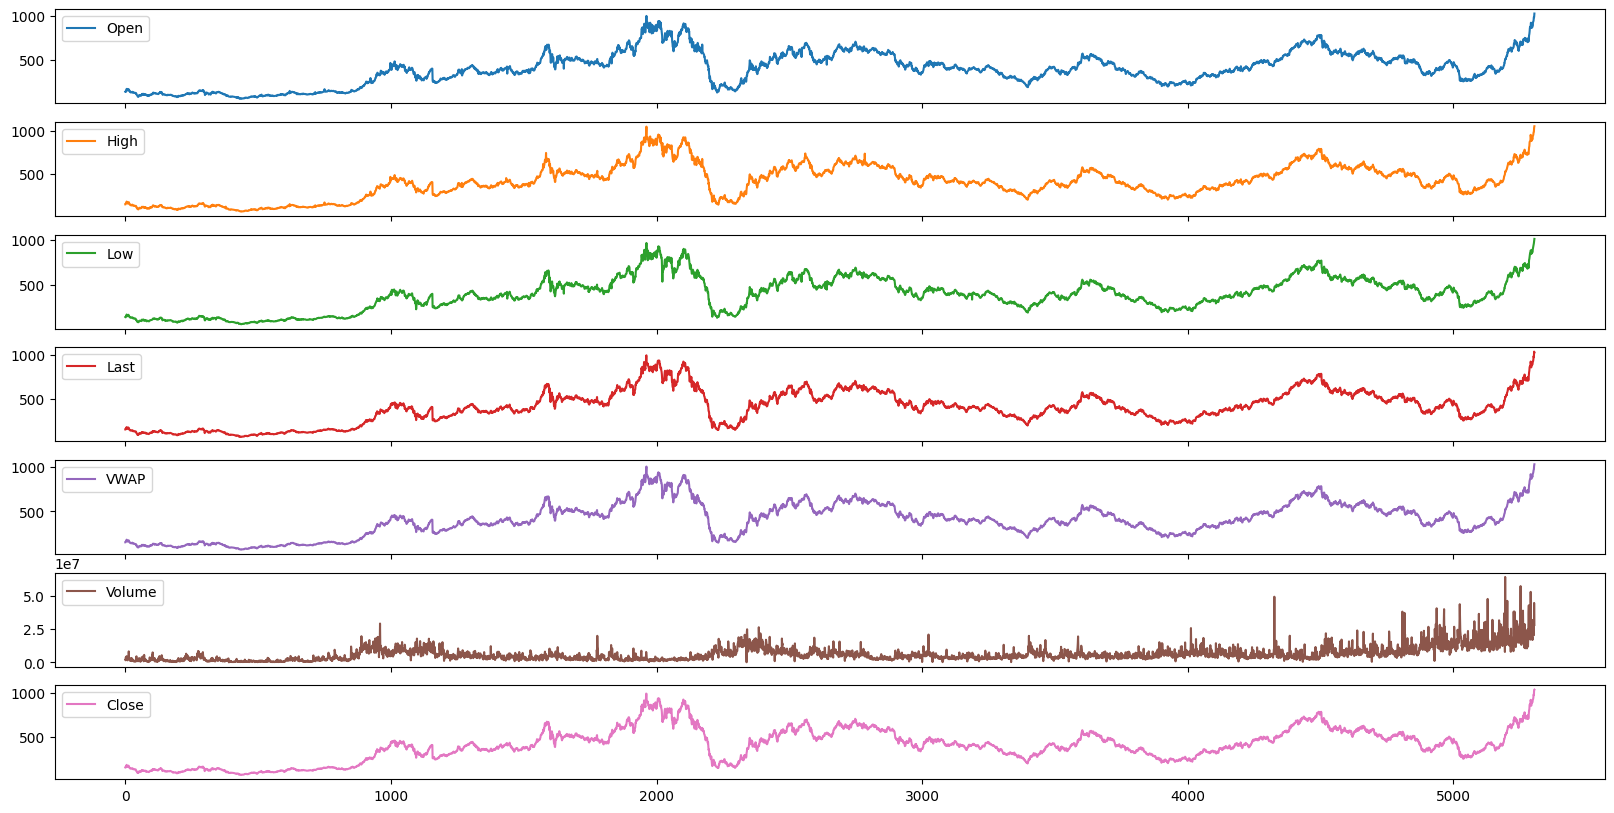

In [17]:
import matplotlib.pyplot as plt

data.plot(subplots=True)


# Simple Moving Averages:

In [18]:
def prepare_data(dataset,start_index,end_index,window_size):
    labels=[]
    features=[]
    for i in range(start_index,end_index-window_size):
        l=range(i,i+window_size)
        features.append(dataset[l])
        labels.append(dataset[l[-1]+1])

    return np.array(features),np.array(labels)

In [19]:
x_train,y_train=prepare_data(uni_data,0,4000,5)
x_test,y_test=prepare_data(uni_data,4000,5141,5)

In [20]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3995, 5)
(3995,)
(1136, 5)
(1136,)


Text(0, 0.5, 'closing price values')

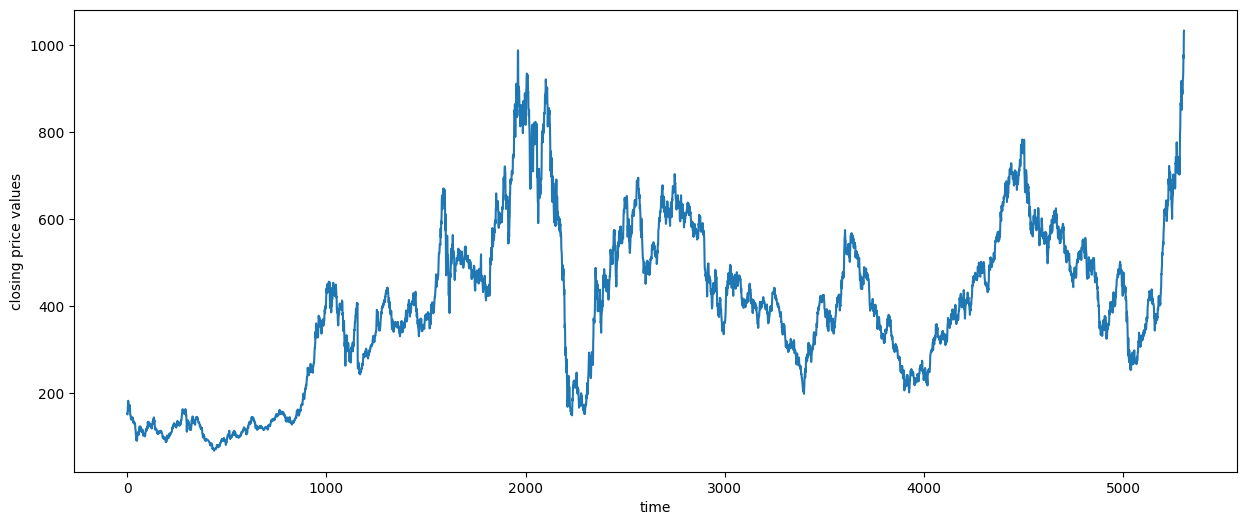

In [21]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(15,6))
ax.plot(uni_data)
plt.xlabel('time')
plt.ylabel('closing price values')

In [22]:
def moving_averages_model(input_data):
    return np.mean(input_data)

In [23]:
y_pred=[]

for i in range(len(x_train)):
    y_pred.append(moving_averages_model(x_train[i]))

In [24]:
from sklearn.metrics import mean_squared_error

error=mean_squared_error(y_train,np.array(y_pred))

In [25]:
window=[3,4,5,6,7,8,9,10]
train_loss=[]
test_loss=[]
for i in window:
    x_train,y_train=prepare_data(uni_data,0,4000,i)
    x_test,y_test=prepare_data(uni_data,4000,5141,i)
    y_train_pred=[]
    y_test_pred=[]
    for j in range(len(x_train)):
        y_train_pred.append(moving_averages_model(x_train[j]))
    for j in range(len(x_test)):
        y_test_pred.append(moving_averages_model(x_test[j]))
    train_loss.append(mean_squared_error(y_train,np.array(y_train_pred)))
    test_loss.append(mean_squared_error(y_test,np.array(y_test_pred)))



In [26]:
plt.rcParams["figure.figsize"] = [10, 6]

Text(0, 0.5, 'losses')

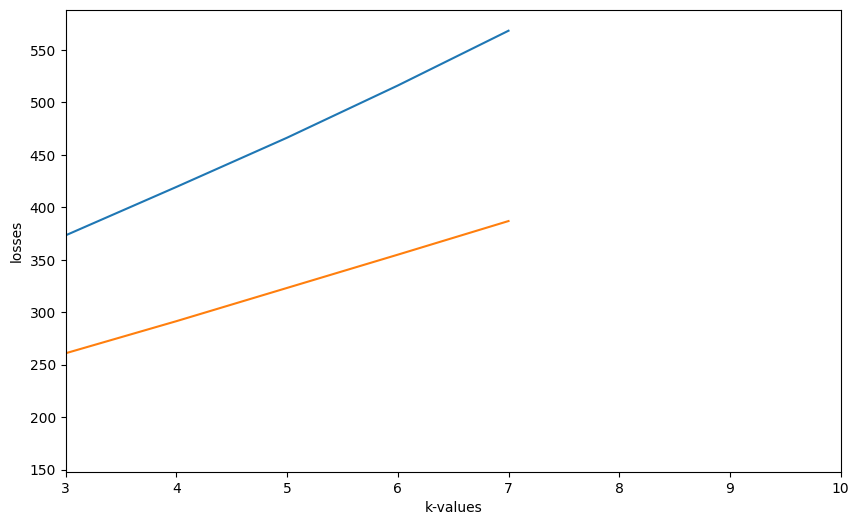

In [27]:
plt.plot(train_loss)
plt.plot(test_loss)
plt.xlim(3,10)
plt.xlabel('k-values')
plt.ylabel('losses')


In [28]:
x_train,y_train=prepare_data(uni_data,0,4000,3)
x_test,y_test=prepare_data(uni_data,4000,5141,3)

y_test_pred=[]

for i in range(len(x_test)):
    y_test_pred.append(moving_averages_model(x_test[i]))

Text(0.5, 1.0, 'predictions')

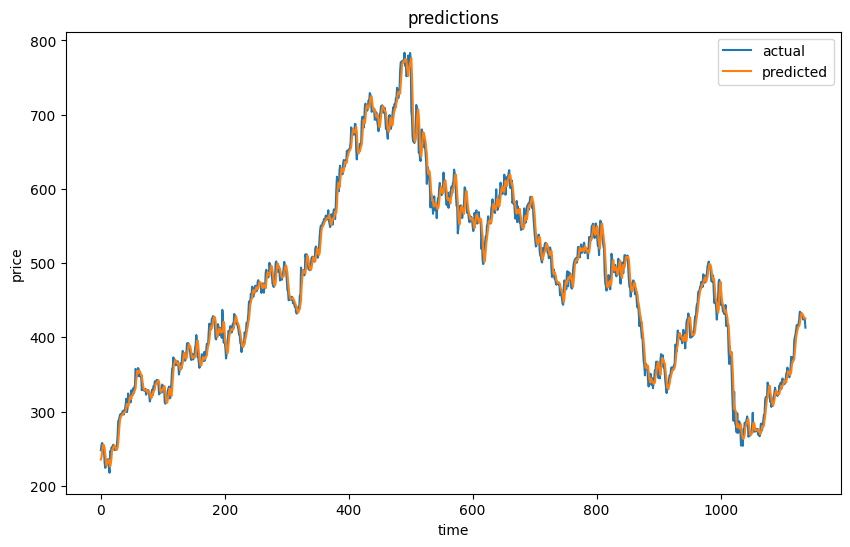

In [29]:
plt.plot(y_test,label='actual')
plt.plot(y_test_pred,label='predicted')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.title('predictions')

# Univariate time-series forecasting:LSTM'S

In [30]:
x_train,y_train=prepare_data(uni_data,0,4000,10)
x_test,y_test=prepare_data(uni_data,4000,5141,10)

In [31]:
x_train_mean=np.mean(x_train,axis=0)
x_train_std=np.std(x_train,axis=0)
x_train = (x_train-x_train_mean)/x_train_std
x_test = (x_test-x_train_mean)/x_train_std

In [32]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3990, 10)
(3990,)
(1131, 10)
(1131,)


## Model Architecture:

In [33]:
from tensorflow.keras.layers import Dense,LSTM,Input

from tensorflow.keras.models import Model

input1=Input(shape=(10,1))

x=LSTM(8,activation='relu')(input1)


x=Dense(16,activation='relu')(x)
x=Dense(1)(x)

model=Model(inputs=input1,outputs=x)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 8)                 320       
                                                                 
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 481 (1.88 KB)
Trainable params: 481 (1.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.compile(optimizer='rmsprop', loss='mae')

## Model Training:

In [35]:
model.fit(x_train,y_train,batch_size=8, epochs=10, verbose=1, validation_data=(x_test,y_test))

Epoch 1/10
499/499 [==============================] - 23s 34ms/step - loss: 152.0907 - val_loss: 25.1616
Epoch 2/10
499/499 [==============================] - 12s 24ms/step - loss: 29.4331 - val_loss: 27.1977
Epoch 3/10
499/499 [==============================] - 12s 23ms/step - loss: 27.6943 - val_loss: 26.4002
Epoch 4/10
499/499 [==============================] - 12s 24ms/step - loss: 27.0473 - val_loss: 23.0693
Epoch 5/10
499/499 [==============================] - 12s 23ms/step - loss: 26.0203 - val_loss: 22.9442
Epoch 6/10
499/499 [==============================] - 12s 24ms/step - loss: 25.7137 - val_loss: 24.9028
Epoch 7/10
499/499 [==============================] - 12s 24ms/step - loss: 25.6118 - val_loss: 20.7385
Epoch 8/10
499/499 [==============================] - 11s 22ms/step - loss: 25.4318 - val_loss: 19.9904
Epoch 9/10
499/499 [==============================] - 11s 22ms/step - loss: 24.5567 - val_loss: 19.6573
Epoch 10/10
499/499 [==============================] - 10s 20ms

# Predictions And Plot Results:

36/36 [==============================] - 0s 5ms/step


Text(0.5, 1.0, 'predictions')

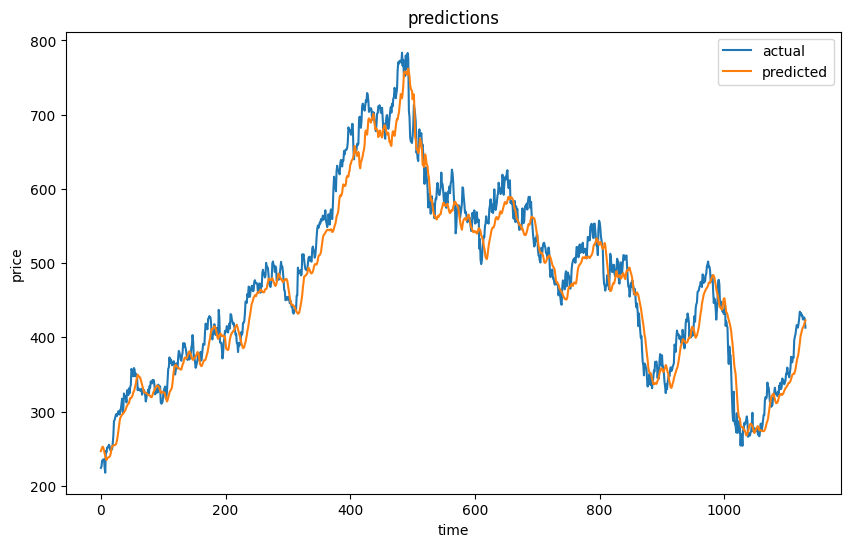

In [36]:
y_test_pred=model.predict(x_test)
plt.plot(y_test,label='actual')
plt.plot(y_test_pred,label='predicted')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.title('predictions')

# Multi-variate & single-step forecasting:LSTM'S

In [37]:
def prepare_data_mul(dataset,start_index,end_index,window_size):
    labels=[]
    features=[]
    for i in range(start_index,end_index-window_size):
        l=range(i,i+window_size)
        features.append(dataset[l])
        labels.append(dataset[l[-1]+1][-1])

    return np.array(features),np.array(labels)

data1=data.values
x_train,y_train=prepare_data_mul(data1,0,4000,10)
x_test,y_test=prepare_data_mul(data1,4000,5141,10)

In [38]:
x_train_mean=np.mean(x_train,axis=0)
x_train_std=np.std(x_train,axis=0)
x_train = (x_train-x_train_mean)/x_train_std
x_test = (x_test-x_train_mean)/x_train_std

In [39]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3990, 10, 7)
(3990,)
(1131, 10, 7)
(1131,)


## Model Architecture:

In [40]:
from tensorflow.keras.layers import Dense,LSTM,Input

from tensorflow.keras.models import Model

input1=Input(shape=(10,7))

x=LSTM(32,activation='relu',return_sequences=True)(input1)


x=LSTM(16,activation='relu')(x)


x=Dense(16,activation='relu')(x)
x=Dense(1)(x)

model=Model(inputs=input1,outputs=x)

model.compile(optimizer='rmsprop', loss='mae')

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10, 7)]           0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 32)            5120      
                                                                 
 lstm_2 (LSTM)               (None, 16)                3136      
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 8545 (33.38 KB)
Trainable params: 8545 (33.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model Training:

In [41]:
model.fit(x_train,y_train,batch_size=8, epochs=10, verbose=1, validation_data=(x_test,y_test))

Epoch 1/10
499/499 [==============================] - 25s 46ms/step - loss: 108.7151 - val_loss: 43.1240
Epoch 2/10
499/499 [==============================] - 21s 43ms/step - loss: 35.7481 - val_loss: 30.1766
Epoch 3/10
499/499 [==============================] - 23s 46ms/step - loss: 30.4382 - val_loss: 24.8750
Epoch 4/10
499/499 [==============================] - 23s 46ms/step - loss: 27.7311 - val_loss: 64.0122
Epoch 5/10
499/499 [==============================] - 23s 47ms/step - loss: 26.5398 - val_loss: 34.0746
Epoch 6/10
499/499 [==============================] - 23s 46ms/step - loss: 25.2361 - val_loss: 35.6714
Epoch 7/10
499/499 [==============================] - 22s 44ms/step - loss: 24.5499 - val_loss: 41.6856
Epoch 8/10
499/499 [==============================] - 23s 46ms/step - loss: 23.6585 - val_loss: 34.2652
Epoch 9/10
499/499 [==============================] - 23s 46ms/step - loss: 22.0606 - val_loss: 37.8517
Epoch 10/10
499/499 [==============================] - 23s 47ms

# Predictions And Plot Results:

36/36 [==============================] - 0s 5ms/step


Text(0.5, 1.0, 'predictions')

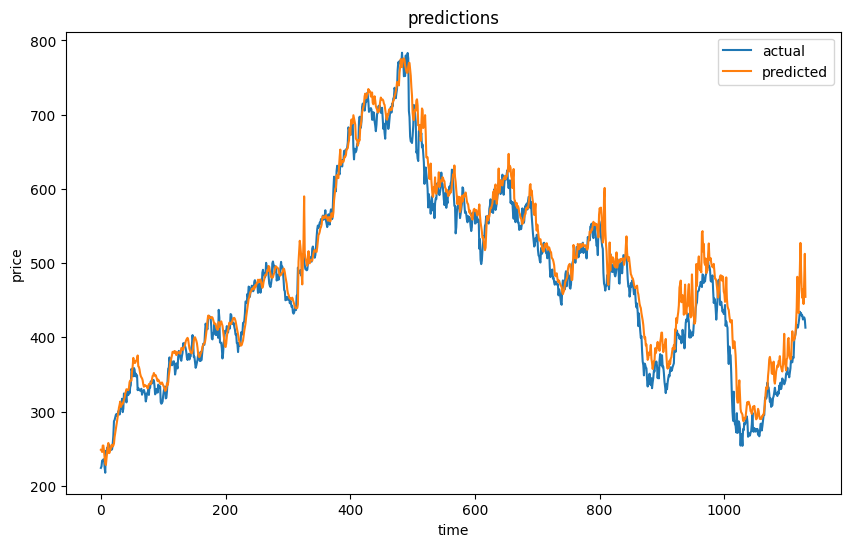

In [42]:
y_test_pred=model.predict(x_test)
plt.plot(y_test,label='actual')
plt.plot(y_test_pred,label='predicted')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.title('predictions')